In [44]:
import matplotlib.pyplot as plot
import seaborn as sb
import pandas as pd
import numpy as np

For our robo car simulation code we did some experimental measurements of the real car:

We measured the following values when invoking the 
RoboCar API function
```
turnLeft(100, timems)
```
angle in degree:

In [45]:
data = {'timems':  [50,100,150,200,250,300,350,400,500],
        'angle': [5,10,16,26,34,38,44,48,68]
        }
turnLeftData =  pd.DataFrame(data)

turnLeftData.head()

,timems,angle
0,50,5
1,100,10
2,150,16
3,200,26
4,250,34


/Users/peterbendel/opt/anaconda3/envs/new_ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


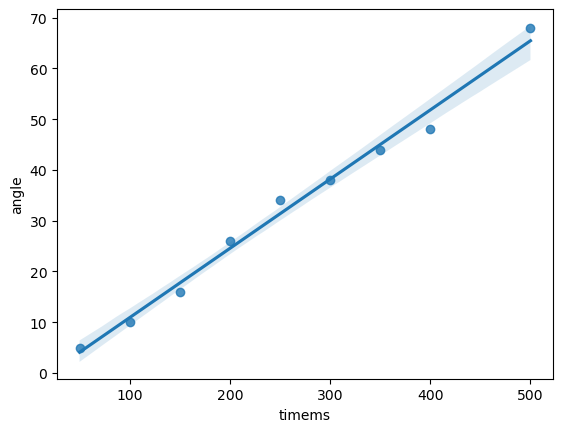

z = 0.13641935483870965 * x + -2.7516129032257965


In [46]:
p=sb.regplot(turnLeftData.timems,turnLeftData.angle)
plot.show()
x = p.get_lines()[0].get_xdata()
y = p.get_lines()[0].get_ydata()
a, b = np.polyfit(x, y, 1)
print ("z = {} * x + {}".format(a, b))

and for 
```
driveForward(100, timems)
```
we measured the following distances in mm

In [47]:
data = {'timems':  [50,100,150,200,250,300,350,400,500],
        'distmm': [8,13,37,42,65,80,95,107,135]
        }
driveForwardData =  pd.DataFrame(data)

driveForwardData.head()

,timems,distmm
0,50,8
1,100,13
2,150,37
3,200,42
4,250,65


/Users/peterbendel/opt/anaconda3/envs/new_ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


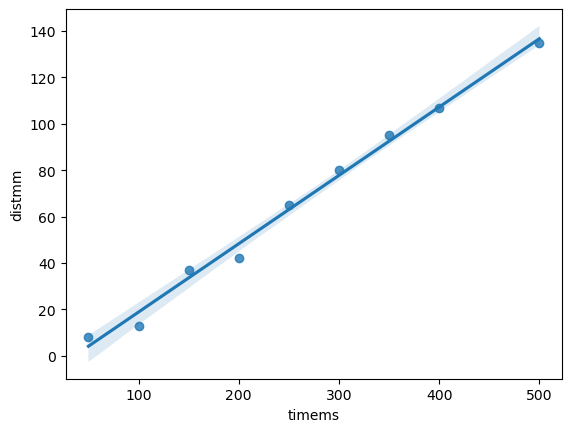

z = 0.2944838709677419 * x + -10.590322580645141


In [48]:
p=sb.regplot(driveForwardData.timems,driveForwardData.distmm)
plot.show()
x = p.get_lines()[0].get_xdata()
y = p.get_lines()[0].get_ydata()
a, b = np.polyfit(x, y, 1)
print ("z = {} * x + {}".format(a, b))

Now we can conclude that we have the following approximate formulas for a speed of 100 for the robo car
```
rotation_angle = 0.14 * timems - 2.75

distance_in_mm = 0.29 * timems - 10.59
````



Some sources used to create the code below


Rotation matrix:
https://www.101computing.net/2d-rotation-matrix/

Scaling, moving and rotating

https://stackoverflow.com/questions/23530449/rotate-scale-and-translate-2d-coordinates

Python libraries

- shapely https://shapely.readthedocs.io/en/maint-1.8/manual.html
- https://pythontic.com/image-processing/pillow/rotate

Drawing shapes and manipulate them
- https://note.nkmk.me/en/python-pillow-imagedraw/
using a coordinate system with 0,0 in upper left corner
- https://pillow.readthedocs.io/en/stable/reference/ImagePath.html
- https://pillow.readthedocs.io/en/stable/handbook/tutorial.html
- https://stackoverflow.com/questions/17056209/python-pil-affine-transformation
- Gifs:
- https://blog.zhaytam.com/2018/08/21/creating-gifs-using-python-pillow/
- https://stackoverflow.com/questions/2275446/python-animation-with-pil




In [ ]:
from Car import CarModel

car = CarModel()
car.setScale(1.0)
car.rotate(-45)

car.moveForward(200)


Draw a single frame with different positions of the car

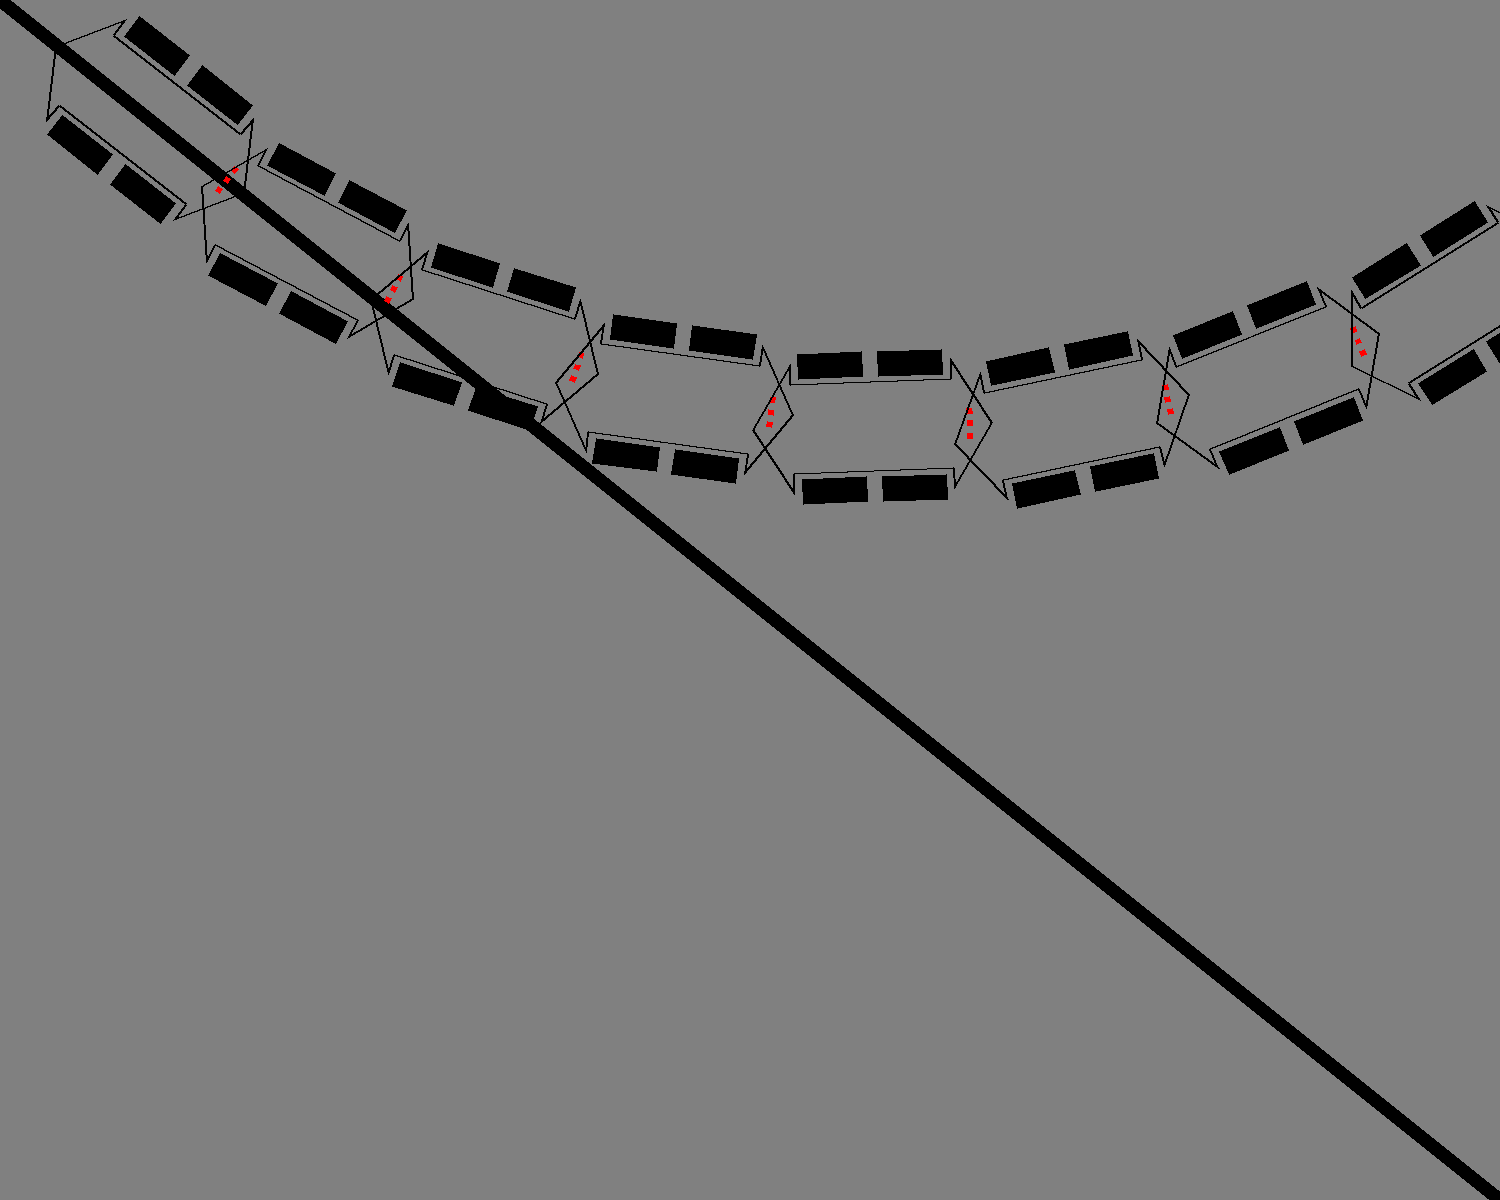

In [49]:
from PIL import Image, ImageDraw
import Car, time
car = Car.CarModel()
#car.setScale(0.5)

im = Image.new('RGBA', (1500, 1200), (128, 128, 128))
draw = ImageDraw.Draw(im)
draw.line((0,0,1500,1200),fill=(0,0,0), width=15 )

# move to start position
car.rotate(90.0)
car.moveForward(120.0)
car.rotate(-90.0)
car.moveForward(150.0)
car.rotate(38.0)
# draw start position
car.draw(draw)

# move and draw car

for i in range(0,10): 
    car.moveForward(200)
    car.rotate(-10)
    car.draw(draw)
   
   
display(im)


    

Generate a GIF "video" from the frames of the simulation, timed with the individual duration of each driving step

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import Car
car = Car.CarModel()
# move to start position
car.rotate(90.0)
car.moveForward(120.0)
car.rotate(-90.0)
car.moveForward(150.0)
car.rotate(38.0)

# draw frames
frames = []
durations = []
time = 0.0

genevafont = ImageFont.truetype("Geneva.ttf", 30)


for i in range (0,17):
    im = Image.new('RGB', (1700, 1400), (128, 128, 128))
    draw = ImageDraw.Draw(im)
    draw.rectangle((100,100,1600,1300),fill=(255,255,255),width=1, outline=(255,255,255) )
    draw.line((100,100,1600,1300),fill=(0,0,0), width=15 )
    text = 'Step: {:3d} Time: {:.2f} s - Sensors: L {:3d} M {:3d} R {:3d}'.format(i*2,time,455,828,444)
    draw.text((400,50), text, font=genevafont)

    # draw after moving forward and save image
    car.moveForward(100)
    time+= 0.2
    car.draw(draw)
    frames.append(im)
    durations.append(200)
    
    
   
    car.rotate(-5)
    time+=0.05
    durations.append(50)
    # draw after rotating
    im = Image.new('RGB', (1700, 1400), (128, 128, 128))
    draw = ImageDraw.Draw(im)
    draw.rectangle((100,100,1600,1300),fill=(255,255,255),width=1, outline=(255,255,255)) 
    draw.line((100,100,1600,1300),fill=(0,0,0), width=15 )
    text = 'Step: {:3d} Time: {:.2f} s - Sensors: L {:3d} M {:3d} R {:3d}'.format(i*2+1,time,455,828,444)
    draw.text((400,50), text, font=genevafont)
    car.draw(draw)
    frames.append(im)
    
    

frames[0].save('carsimulation.gif', format='GIF', append_images=frames[1:], save_all=True, duration=durations, loop=0, optimize=True)


![SegmentLocal](carsimulation.gif "segment")